In [1]:
from evoman.environment import Environment
from demo_controller import player_controller

import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
results = {}
method_list = ['GA', 'ES']
enemy_list=[3, 4, 5]


for enemy in enemy_list:
    for method in method_list:
        if method == 'GA':
            n_hidden_neurons = 7
        else:
            n_hidden_neurons = 14

        env = Environment(experiment_name='best_experiment_test',
                playermode="ai",
				player_controller=player_controller(n_hidden_neurons),
				speed="normal",
				enemymode="static",
                logs="off",
                randomini="yes",
				level=2,
				visuals=True)
               
        env.update_parameter('enemies',[enemy])

        best_files = glob.glob(f'optimization_train_{enemy}_{method}_*'+'/best.txt')
        avg_individual_gain_list = []
        for file in best_files:
            sol = np.loadtxt(file)
            individual_gain_list = []
            for i in range(5):
                _, player_life, enemy_life, _=env.play(sol)
                indivdual_gain=player_life-enemy_life
                individual_gain_list.append(indivdual_gain)
            avg_individual_gain = np.mean(individual_gain_list)
            avg_individual_gain_list.append(avg_individual_gain)
        results[(enemy, method)] = avg_individual_gain_list

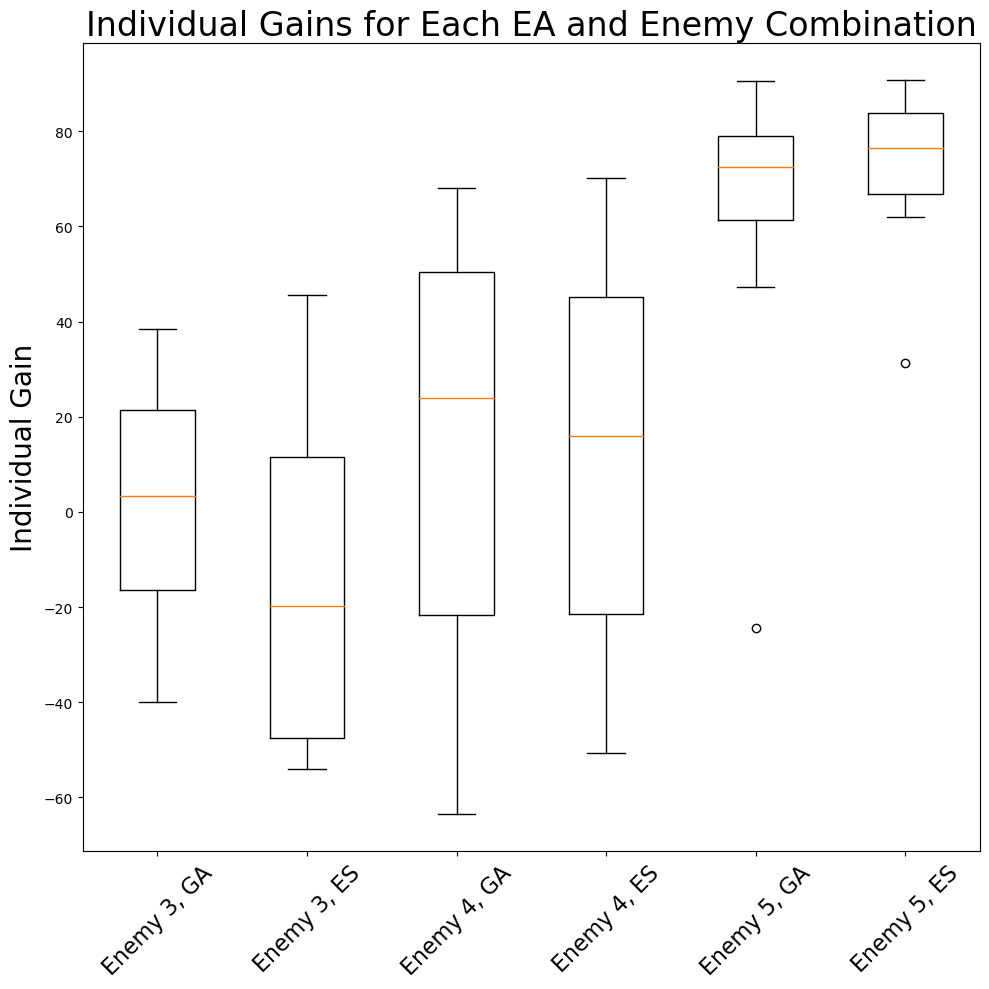

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sorted_keys = sorted(results.keys(), key=lambda x: (x[0], x[1] != 'GA'))
data = [results[key] for key in sorted_keys]
labels = [f"Enemy {e}, {m}" for e, m in sorted_keys]


ax.boxplot(data, labels=labels)
ax.set_title('Individual Gains for Each EA and Enemy Combination', fontsize=24)
ax.set_ylabel('Individual Gain', fontsize=20)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=16)

plt.tight_layout()
plt.savefig("box_plot.png", dpi=150)

In [4]:
# t-test
alpha = 0.05
ttest_results = {}

for enemy in enemy_list:
    ga_results = results[(enemy, 'GA')]
    es_results = results[(enemy, 'ES')]

    t_stat, p_value = stats.ttest_ind(ga_results, es_results, equal_var=False)
    ttest_results[enemy] = {'t_stat': t_stat, 'p_value': p_value}

for enemy, res in ttest_results.items():
    print(f"Enemy {enemy} - t-statistic: {res['t_stat']:.3f}, p-value: {res['p_value']:.3e}")
    if res['p_value'] < alpha:
        print(f"For Enemy {enemy}, the difference between GA and ES is statistically significant.")
    else:
        print(f"For Enemy {enemy}, no significant difference was found.")


Enemy 3 - t-statistic: 1.159, p-value: 2.626e-01
For Enemy 3, no significant difference was found.
Enemy 4 - t-statistic: 0.072, p-value: 9.434e-01
For Enemy 4, no significant difference was found.
Enemy 5 - t-statistic: -0.816, p-value: 4.288e-01
For Enemy 5, no significant difference was found.


In [5]:
# Mann-Whitney U test
mannwhitney_results = {}

for enemy in enemy_list:
    ga_results = results[(enemy, 'GA')]
    es_results = results[(enemy, 'ES')]

    u_stat, p_value = stats.mannwhitneyu(ga_results, es_results, alternative='two-sided')
    mannwhitney_results[enemy] = {'u_stat': u_stat, 'p_value': p_value}


for enemy, res in mannwhitney_results.items():
    print(f"Enemy {enemy} - U statistic: {res['u_stat']:.3f}, p-value: {res['p_value']:.3e}")
    if res['p_value'] < alpha:
        print(f"For Enemy {enemy}, the difference between GA and ES is statistically significant.")
    else:
        print(f"For Enemy {enemy}, no significant difference was found.")


Enemy 3 - U statistic: 67.500, p-value: 1.984e-01
For Enemy 3, no significant difference was found.
Enemy 4 - U statistic: 52.000, p-value: 9.097e-01
For Enemy 4, no significant difference was found.
Enemy 5 - U statistic: 43.000, p-value: 6.232e-01
For Enemy 5, no significant difference was found.


In [6]:
# Kolmogorov-Smirnov test
ks_results = {}

for enemy in enemy_list:
    ga_results = results[(enemy, 'GA')]
    es_results = results[(enemy, 'ES')]

    ks_stat, p_value = stats.ks_2samp(ga_results, es_results)
    ks_results[enemy] = {'ks_stat': ks_stat, 'p_value': p_value}

for enemy, res in ks_results.items():
    print(f"Enemy {enemy} - KS statistic: {res['ks_stat']:.3f}, p-value: {res['p_value']:.3e}")


Enemy 3 - KS statistic: 0.400, p-value: 4.175e-01
Enemy 4 - KS statistic: 0.200, p-value: 9.945e-01
Enemy 5 - KS statistic: 0.200, p-value: 9.945e-01


In [8]:
# Kruskal-Wallis H test
kruskal_results = {}

for enemy in enemy_list:
    ga_results = results[(enemy, 'GA')]
    es_results = results[(enemy, 'ES')]

    h_stat, p_value = stats.kruskal(ga_results, es_results)  
    kruskal_results[enemy] = {'h_stat': h_stat, 'p_value': p_value}

for enemy, res in kruskal_results.items():
    print(f"Enemy {enemy} - H statistic: {res['h_stat']:.3f}, p-value: {res['p_value']:.3e}")

    if res['p_value'] < alpha:
        print(f"For Enemy {enemy}, the difference between GA and ES is statistically significant.")
    else:
        print(f"For Enemy {enemy}, no significant difference was found.")

Enemy 3 - H statistic: 1.753, p-value: 1.855e-01
For Enemy 3, no significant difference was found.
Enemy 4 - H statistic: 0.023, p-value: 8.798e-01
For Enemy 4, no significant difference was found.
Enemy 5 - H statistic: 0.280, p-value: 5.967e-01
For Enemy 5, no significant difference was found.
